In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

import matplotlib.pyplot as plt
from IPython.display import Image

# 가장 기본적인 Vanilla Auto-Encoder 구현

In [5]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image (28x28)
input_img = tf.keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


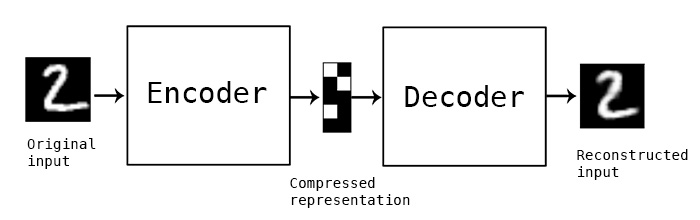

In [7]:
Image('img/autoencoder_schema.jpg')

## Encoder 부분만 떼어내기

In [8]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

## Decoder 부분만 떼어내기

In [9]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

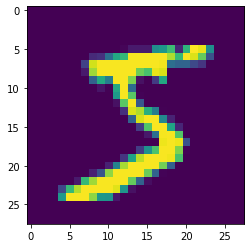

In [12]:
plt.imshow(x_train[0]/255, interpolation='nearest')
plt.show()

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [14]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 4s 13ms/step - loss: 0.2782 - val_loss: 0.1910
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1722 - val_loss: 0.1547
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1446 - val_loss: 0.1327
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1276 - val_loss: 0.1204
Epoch 5/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1174 - val_loss: 0.1121
Epoch 6/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 7/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1049 - val_loss: 0.1015
Epoch 8/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1013 - val_loss: 0.0986
Epoch 9/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0988 - val_loss: 0.0966
Epoch 10/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0972 - val_lo

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


In [17]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


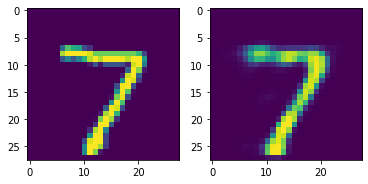

In [18]:
fig = plt.figure(figsize=(6, 3))

fig.add_subplot(1, 2, 1) # row, column, n번째 image
plt.imshow(x_test[0].reshape(28, 28)/255, interpolation='nearest')

fig.add_subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28)/255, interpolation='nearest')

In [19]:
encoded_imgs[0]

array([ 3.9015274,  8.262909 ,  8.375115 , 11.121873 ,  1.1293173,
        4.2373676,  2.9583142,  5.9858   ,  6.538045 ,  4.0313373,
        9.538191 ,  3.615557 ,  3.3091486,  4.5959373,  9.32698  ,
       11.725481 ,  9.166889 , 17.012276 ,  2.4758348,  2.283467 ,
        3.345174 ,  4.0287595, 13.597603 ,  9.281525 ,  6.104735 ,
        5.6949987,  3.8508258,  5.5528135,  6.6742563,  8.668815 ,
        5.1454186,  7.139448 ], dtype=float32)

1/1 [==============================] - 0s 122ms/step


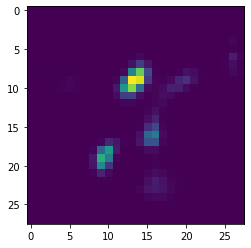

In [23]:
res = decoder.predict([[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2]])

plt.imshow(res.reshape(28, 28)/255, interpolation='nearest')